# Capstone Part 6

https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/

Predicting stock price with linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
! pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=86c87ad6cb929fd3707daed2d0d26a188c2d176951fc77f07143427758dc7d5a
  Stored in directory: /Users/conorsmith/Library/Caches/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [2]:
import pandas_ta

In [3]:
sp500 = pd.read_csv('sp500_index.csv', index_col='Date', parse_dates=['Date'])
sp500.head()

,S&P500
Date,
2012-10-22,1433.82
2012-10-23,1413.11
2012-10-24,1408.75
2012-10-25,1412.97
2012-10-26,1411.94


In [4]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-10-22 to 2022-10-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S&P500  2517 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


<AxesSubplot:xlabel='Date'>

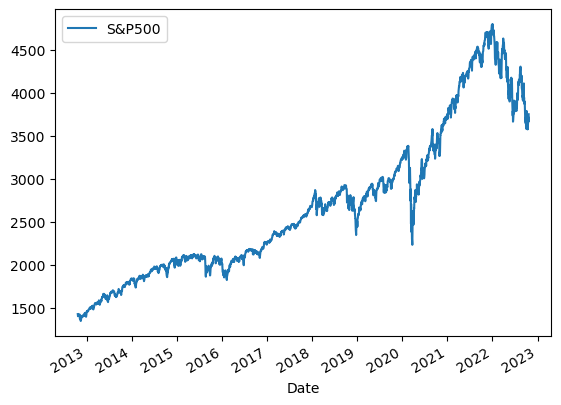

In [5]:
sp500.plot()

In [6]:
sp500.ta.ema(close='S&P500', length=10, append=True)

Date
2012-10-22            NaN
2012-10-23            NaN
2012-10-24            NaN
2012-10-25            NaN
2012-10-26            NaN
                 ...     
2022-10-17    3653.667651
2022-10-18    3665.724441
2022-10-19    3671.076361
2022-10-20    3670.113386
2022-10-21    3685.138225
Name: EMA_10, Length: 2517, dtype: float64

In [7]:
print(sp500.head(10))

             S&P500    EMA_10
Date                         
2012-10-22  1433.82       NaN
2012-10-23  1413.11       NaN
2012-10-24  1408.75       NaN
2012-10-25  1412.97       NaN
2012-10-26  1411.94       NaN
2012-10-31  1412.16       NaN
2012-11-01  1427.59       NaN
2012-11-02  1414.20       NaN
2012-11-05  1417.26       NaN
2012-11-06  1428.39  1418.019


In [8]:
sp500 = sp500.iloc[10:]
print(sp500.head())

             S&P500       EMA_10
Date                            
2012-11-07  1394.53  1413.748273
2012-11-08  1377.51  1407.159496
2012-11-09  1379.85  1402.194133
2012-11-12  1380.03  1398.164291
2012-11-13  1374.53  1393.867147


In [9]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2507 entries, 2012-11-07 to 2022-10-21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S&P500  2507 non-null   float64
 1   EMA_10  2507 non-null   float64
dtypes: float64(2)
memory usage: 58.8 KB


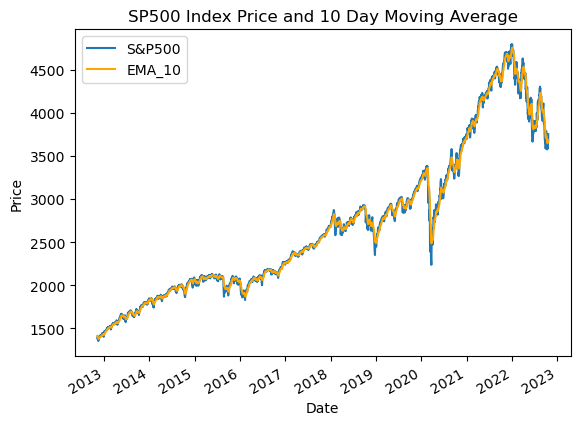

In [10]:
sp500['S&P500'].plot()
sp500['EMA_10'].plot(color='orange')
plt.legend()
plt.title('SP500 Index Price and 10 Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

In [27]:
! pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 9.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 10.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 10.0 MB/s eta 0:00:00


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
sp500.reset_index(inplace=True)

In [22]:
sp500.head()

,Date,S&P500,EMA_10
0,2012-11-07,1394.53,1413.748273
1,2012-11-08,1377.51,1407.159496
2,2012-11-09,1379.85,1402.194133
3,2012-11-12,1380.03,1398.164291
4,2012-11-13,1374.53,1393.867147


In [32]:
X_train, X_test, y_train, y_test = train_test_split(sp500[['S&P500']], sp500[['EMA_10']], test_size=0.2, random_state=42)

In [33]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [36]:
X_test = X_test.sort_index()
X_test

,S&P500
25,1419.45
29,1435.81
43,1472.12
44,1472.05
48,1480.94
...,...
2480,3901.35
2487,3655.04
2488,3647.29
2493,3790.93


In [37]:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.99810786]]
Mean Absolute Error: 25.4469748916
Coefficient of Determination: 0.9979082198581398


In [38]:
y_test['y_pred'] = y_pred


In [42]:

y_test.sort_index(inplace=True)

In [43]:
y_test.head()

,EMA_10,y_pred
25,1416.945748,1418.204185
29,1426.112769,1434.533230
43,1453.554625,1470.774526
44,1456.917420,1470.704659
48,1466.870223,1479.577838


<AxesSubplot:>

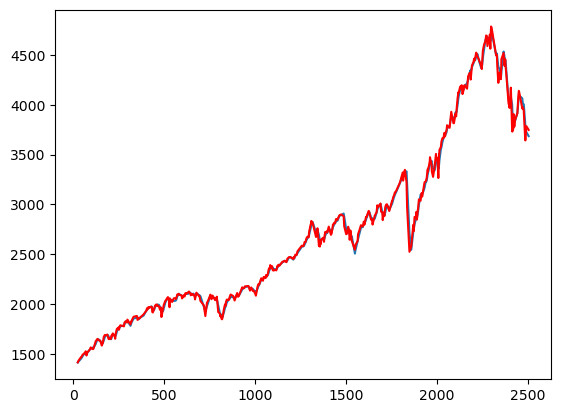

In [45]:
y_test['EMA_10'].plot()
y_test['y_pred'].plot(color='red')

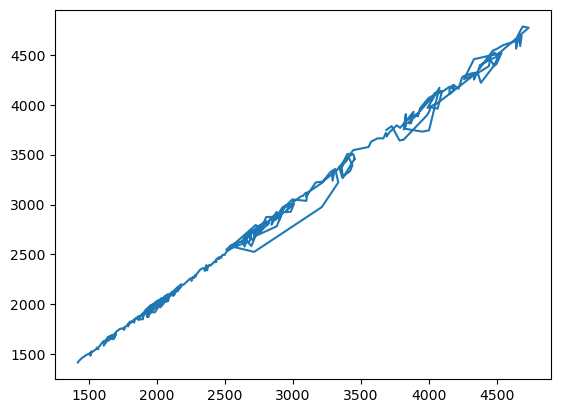

In [48]:
plt.plot(y_test['EMA_10'], y_test['y_pred'])